# Final Project Part 3

## Dataset and Problem Statement

*About this data set:*

This data was compiled from surveys given to 126 Mercyhurst University students and is available on Kaggle.

https://www.kaggle.com/borapajo/food-choices 

I found it interesting data to try to work with because I work for NC State University Dining. This was the only open data set I could find that related to my work. I thought it would be interesting to see if one could predict the eating habits of college students from their self-reported data. Most answers were allowed to be freely entered. The originators of the survey then read and coded the results by hand and included both the original answers and the coded answers in the dataset and provided a .doc file with a copy of the survey and the coding method.  It is not the best kind of data set to use since it is not passively collected; there can be a lot of bias resulting just in the way the study was administered. Additionally, the diet outcomes were coded into only four types after collecting the data, with over 80% of respondants falling into one of two categories. One thing we might be able to see is if any of the categories might be meaningful for future studies. If I were to launch a study similiar to this, I would attempt to get verfiably true answers vs. self-reported only answers(like actually weighing participants), use scales (e.g. from 1 to 5, disagree to agree) rather than open text for everything, and find some way to observe eating habits rather than just asking what people eat. For the purposes of this exericise, we'll move forward with the available data and see how accurately we can guess their regular diet type based off other aspects of their life.



 *Data and Model Imports*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#loading in the dataset:
food = pd.read_csv('food_coded.csv')

## Data Cleaning

Data Overview

- Descriptive Statistics

In [3]:
#Since no cleanig has taken place, we use include ='all' to get information for non numeric columns.
food.describe(include='all')

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
count,125.000000,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,124,124,106.000000,...,125.000000,124.000000,125.000000,124.000000,125.000000,104,125.000000,125.000000,125.000000,123
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124,107,NaN,...,NaN,NaN,NaN,NaN,NaN,67,NaN,NaN,NaN,47
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cookies, popcorn, and chips",boredom,NaN,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,135
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,NaN,...,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,8
mean,3.418536,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,NaN,NaN,2.698113,...,1.208000,1.379032,3.336000,947.580645,555.040000,NaN,4.008000,1.512000,1073.400000,NaN
std,0.383657,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,NaN,NaN,1.972042,...,0.426841,0.503528,1.436528,202.090179,152.370379,NaN,1.081337,0.501867,248.667092,NaN
min,2.200000,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,NaN,NaN,1.000000,...,0.000000,0.000000,1.000000,580.000000,345.000000,NaN,1.000000,1.000000,575.000000,NaN
25%,3.200000,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,NaN,NaN,2.000000,...,1.000000,1.000000,2.000000,725.000000,500.000000,NaN,3.000000,1.000000,900.000000,NaN
50%,3.500000,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,NaN,NaN,2.000000,...,1.000000,1.000000,3.000000,940.000000,500.000000,NaN,4.000000,2.000000,900.000000,NaN
75%,3.700000,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,NaN,NaN,3.000000,...,1.000000,2.000000,5.000000,1165.000000,690.000000,NaN,5.000000,2.000000,1315.000000,NaN


- Number of Rows and Columns

In [4]:
#I must have deleted a row from the original dataframe in the .csv file itself
food.shape

(125, 61)

- Column Datatypes

In [5]:
food.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [6]:
food.dtypes

GPA                             float64
Gender                            int64
breakfast                         int64
calories_chicken                  int64
calories_day                    float64
calories_scone                  float64
coffee                            int64
comfort_food                     object
comfort_food_reasons             object
comfort_food_reasons_coded      float64
cook                            float64
comfort_food_reasons_coded.1      int64
cuisine                         float64
diet_current                     object
diet_current_coded                int64
drink                           float64
eating_changes                   object
eating_changes_coded              int64
eating_changes_coded1             int64
eating_out                        int64
employment                      float64
ethnic_food                       int64
exercise                          int64
father_education                float64
father_profession                object


In [7]:
#I like to use the pd.Series, so that it lists all the columns each on their own line, giving you the column index.
#using just food.columns is better, though, when you want to copy and paste columns or see them all at once
#The output for pd.Series will hide the center columns
pd.Series(food.columns)

0                              GPA
1                           Gender
2                        breakfast
3                 calories_chicken
4                     calories_day
5                   calories_scone
6                           coffee
7                     comfort_food
8             comfort_food_reasons
9       comfort_food_reasons_coded
10                            cook
11    comfort_food_reasons_coded.1
12                         cuisine
13                    diet_current
14              diet_current_coded
15                           drink
16                  eating_changes
17            eating_changes_coded
18           eating_changes_coded1
19                      eating_out
20                      employment
21                     ethnic_food
22                        exercise
23                father_education
24               father_profession
25                     fav_cuisine
26               fav_cuisine_coded
27                        fav_food
28                  

Standardizing values in numeric columns

- The column 'weight' is listed as object, but should be float or int. 

In [8]:
#value_counts will show us all the data for the column and how much of each
#this way we can easily view the non-numeric values
food.weight.value_counts()

135                         8
140                         8
150                         7
170                         7
180                         6
175                         6
155                         6
185                         6
125                         5
190                         5
165                         5
145                         4
130                         4
200                         4
120                         3
160                         3
129                         2
113                         2
210                         2
167                         2
128                         2
138                         1
230                         1
118                         1
195                         1
116                         1
127                         1
105                         1
156                         1
264                         1
187                         1
260                         1
112                         1
184       

In [9]:
food = food.replace({"I'm not answering this. ": np.nan, '144 lbs': 144, 'Not sure, 240': 240})

In [10]:
#I may have a lot of NaN values other places and I'm not ready to drop them without inspection yet.
#I only need to be able to convert weight to a numeric column for now, 
#so I'll only drop rows that have a NaN value in 'weight'
food = food.dropna(subset=['weight'])

In [11]:
food = food.astype({'weight': 'int64'})

- The column 'GPA' has a varying number decimal places and the differences past the first decimal place might add to much meaningless complexity.

In [12]:
food.GPA = food.GPA.round(decimals=1)

Handling Non-numeric Columns

In [13]:
#The non-numeric columns from this dataset have already been coded in numbers by categorizing the answers.
#The coded columns were decided and added by the original owners of the dataset.
#I will simply select all data types that are numeric and use that as my dataframe moving forward.
#I'm doing this before I drop the NaN values so that I don't drop rows unneccessarily.
food = food.select_dtypes('number')

Handling Missing Values

In [14]:
#First I will get a count of all NaN values in each column.
food.isnull().sum()

GPA                              0
Gender                           0
breakfast                        0
calories_chicken                 0
calories_day                    19
calories_scone                   1
coffee                           0
comfort_food_reasons_coded      19
cook                             3
comfort_food_reasons_coded.1     0
cuisine                         16
diet_current_coded               0
drink                            2
eating_changes_coded             0
eating_changes_coded1            0
eating_out                       0
employment                       9
ethnic_food                      0
exercise                         0
father_education                 1
fav_cuisine_coded                0
fav_food                         1
fries                            0
fruit_day                        0
grade_level                      0
greek_food                       0
healthy_feeling                  0
ideal_diet_coded                 0
income              

In [15]:
#In order to preserve as many rows of data as possible, I will drop columns that have a high number of NaN values.

nan_count = food.isnull().apply(sum, axis=0) # count the number of NaN in each column

for col in food:
    if nan_count[col] >=4:
        del food[col]

In [16]:
food = food.dropna()

In [17]:
#Overall I have lost 19 rows of data from the original 125.
food.shape

(106, 45)

## Exploratory Analysis

- Descriptive Statistics for Clean Data Set

In [18]:
food.describe()

,GPA,Gender,breakfast,calories_chicken,calories_scone,coffee,cook,comfort_food_reasons_coded.1,diet_current_coded,drink,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,3.424528,1.386792,1.094340,585.566038,501.226415,1.754717,2.764151,2.556604,1.707547,1.575472,...,3.150943,1.216981,1.349057,3.264151,950.283019,564.669811,4.028302,1.500000,1085.849057,160.254717
std,0.384165,0.489329,0.293689,124.887227,220.384741,0.432299,1.047008,1.831368,0.742800,0.496619,...,1.110919,0.414148,0.498425,1.436278,198.504924,150.528069,1.073113,0.502375,245.119477,32.743465
min,2.200000,1.000000,1.000000,265.000000,315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000,105.000000
25%,3.200000,1.000000,1.000000,610.000000,420.000000,2.000000,2.000000,1.250000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000,135.000000
50%,3.500000,1.000000,1.000000,610.000000,420.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,1.500000,1315.000000,155.000000
75%,3.700000,2.000000,1.000000,720.000000,420.000000,2.000000,3.000000,3.000000,2.000000,2.000000,...,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000,180.000000
max,4.000000,2.000000,2.000000,720.000000,980.000000,2.000000,5.000000,9.000000,4.000000,2.000000,...,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000,265.000000


- Histograms


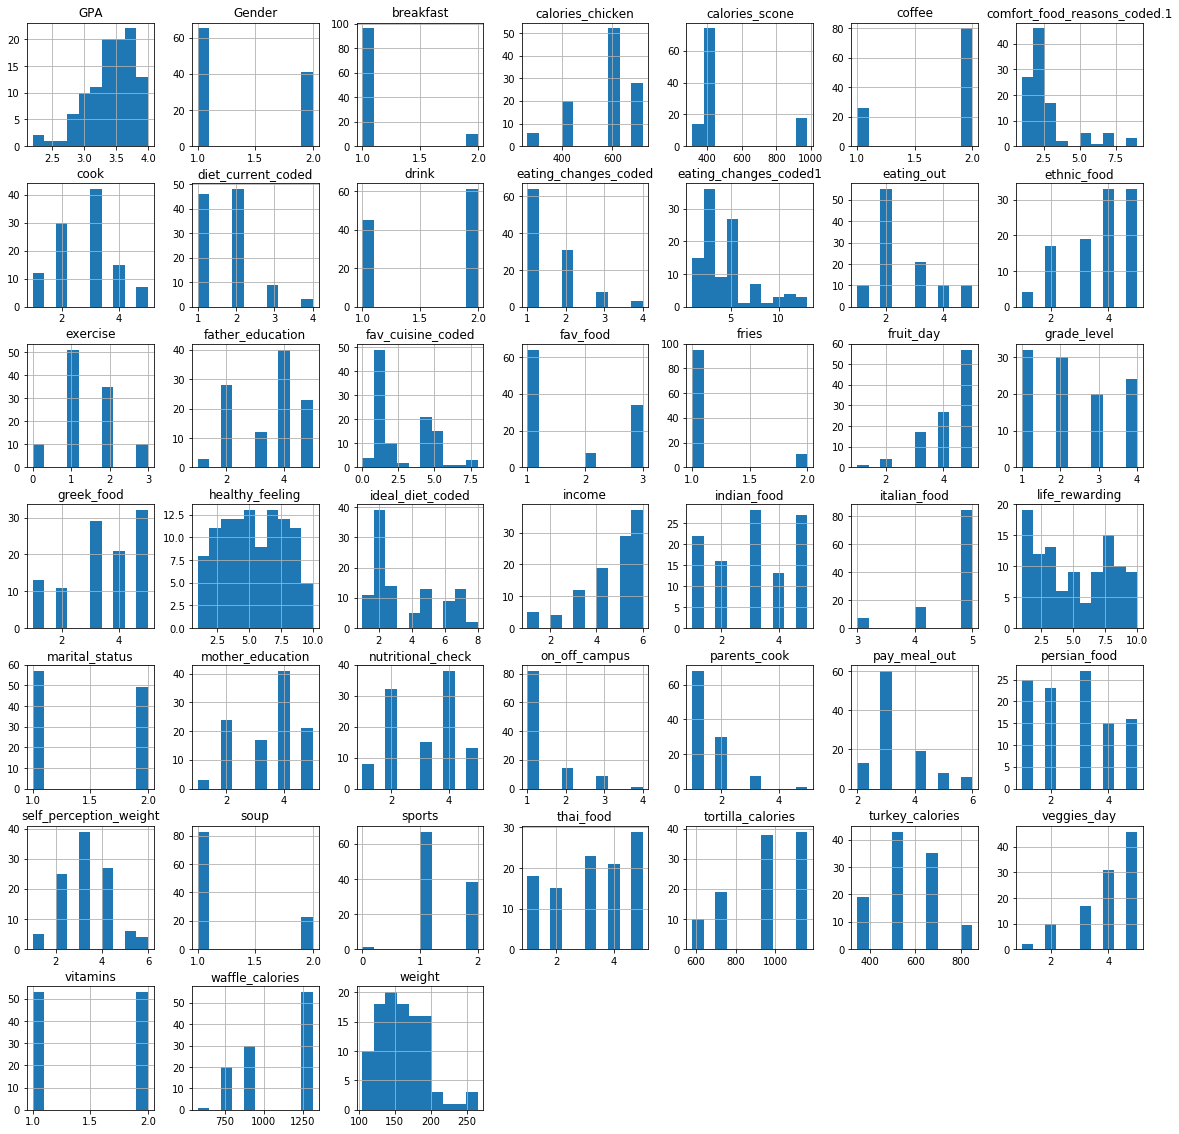

In [19]:
food.hist(figsize = (20,20));

   - Correlation Heat Map

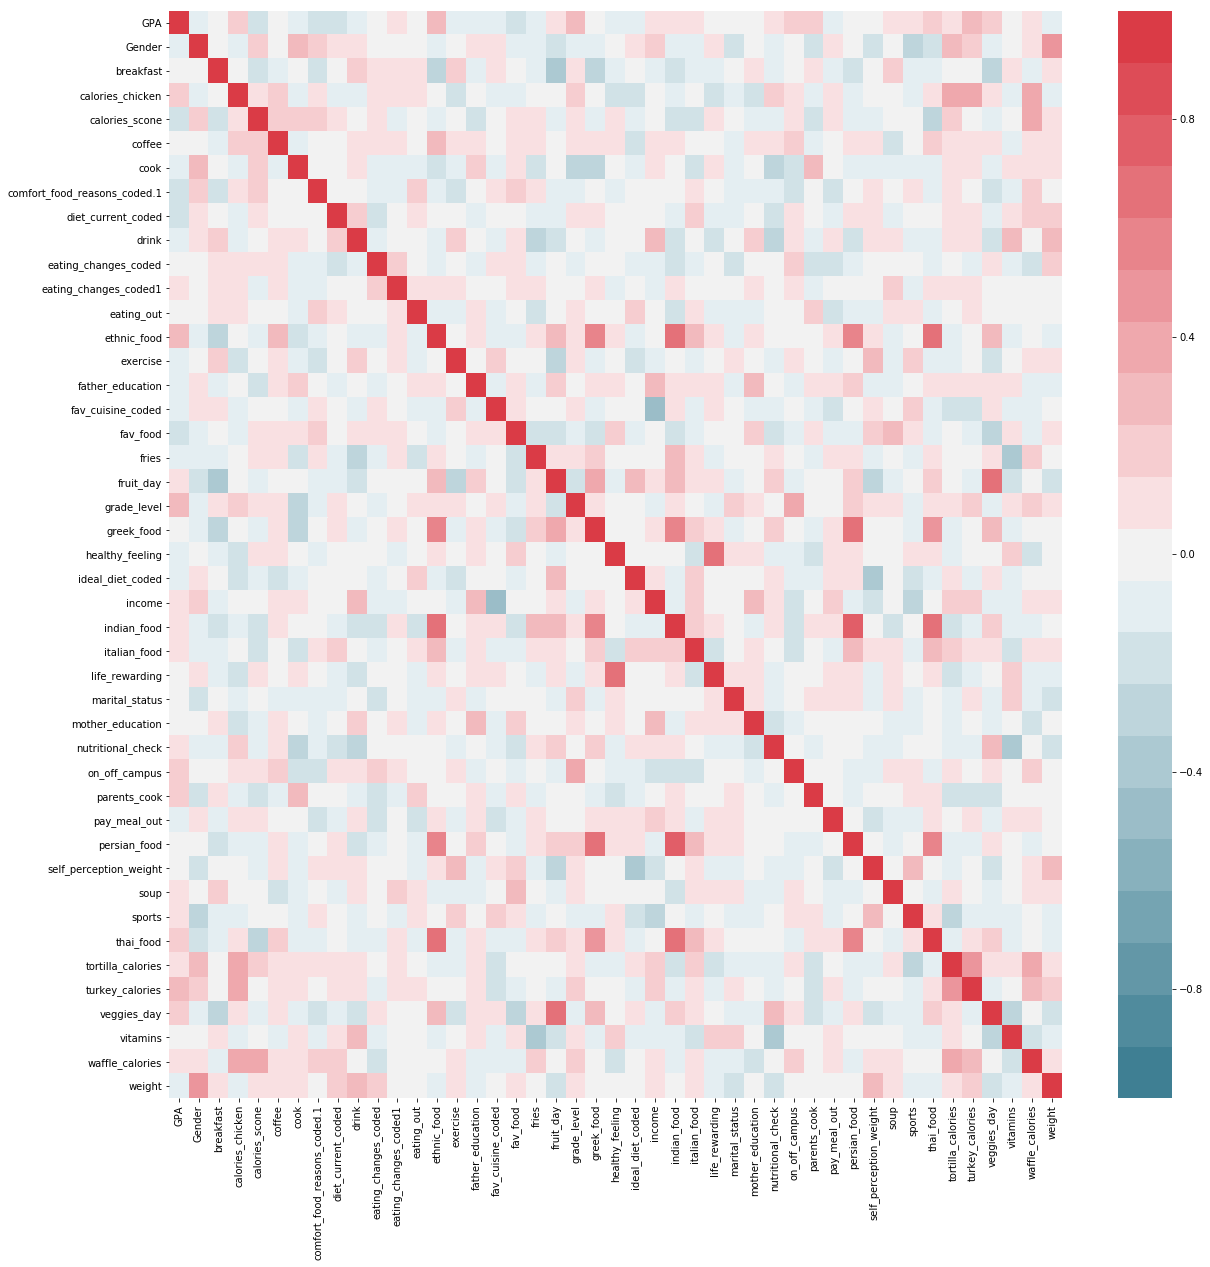

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(food.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            ax=ax
            );

The correlations are not strong or clear. I expect to need to use a Random Forest  Classifer.

## Modeling Approach

Since this is a classification problem, we are putting students into categories based on their current diet, we will use classification rather than regression models.

Discussion of Accuracy Measures

- Mean Absolute Error lets us know how far we are from the true value on average. We will look at this metric to evaluate the model used as well as R^2 which gives us an idea of how well the model performs in contrast to a model that simply predicts the mean every time.

In [21]:
#first we will define our feature and target columns
#Next we will be spliting the data 70/30 for a training set and a test set.
X = food.drop('diet_current_coded', axis='columns')
y = food.loc[:, 'diet_current_coded']
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=.3)

In [57]:
#We will start with trying a simple Logistic Regression Model
lr = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=21)#instantiate the model
#passed a solver and multi_class just to silence warnings, I found that it also reduces the score on the training set, but increases the score on test set. 
#So it reduces variance and improves performance.  
lr.fit(X_train, y_train)#fit the training set

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
print(lr.score(X_train, y_train))#This gives the R**2 score for this model the training data
print(lr.score(X_test, y_test))

0.6216216216216216
0.5


This first pass model is supposedly accurate about 50% more often than just guessing the mean everytime. It seems to be underfitting the data.  I didn't expect it to be great, but wanted to use it for comparison purposes.

In [64]:
y_pred = lr.predict(X_test)
true = np.array(y_test)
pred = np.array(y_pred)
print('MAE:',metrics.mean_absolute_error(true, pred))

MAE: 0.84375


It seems like really though, we're off by about 85% on any given guess from this model.

In [61]:
rfc = RandomForestClassifier(n_estimators=200, random_state=21)#instaniate the model with a random_state for reproducibility
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.75


In [63]:
y_pred = rfc.predict(X_test)
true = np.array(y_test)
pred = np.array(y_pred)
print("MAE:",metrics.mean_absolute_error(true, pred))

MAE: 0.46875


Without any tweaking, the Random Forest Classifier is doing much better than the Logistic Regression model.

In [26]:
#lets use a function to find the best max_depth
y_pred = rfc.predict(X_test)#now I will automate the process to find the best max_depth

max_depth_range = range(1, 30)#this is the range of numbers we will check for max_depth

from sklearn.metrics.scorer import make_scorer

def neg_rmse(y_test, y_pred): 
    squared_errors = (y_test-y_pred)**2
    mse = squared_errors.mean()
    rmse = np.sqrt(mse)
    return -rmse
neg_rmse_scorer = make_scorer(neg_rmse)

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0, 0.5, 'RMSE, lowest score =  best max_depth')

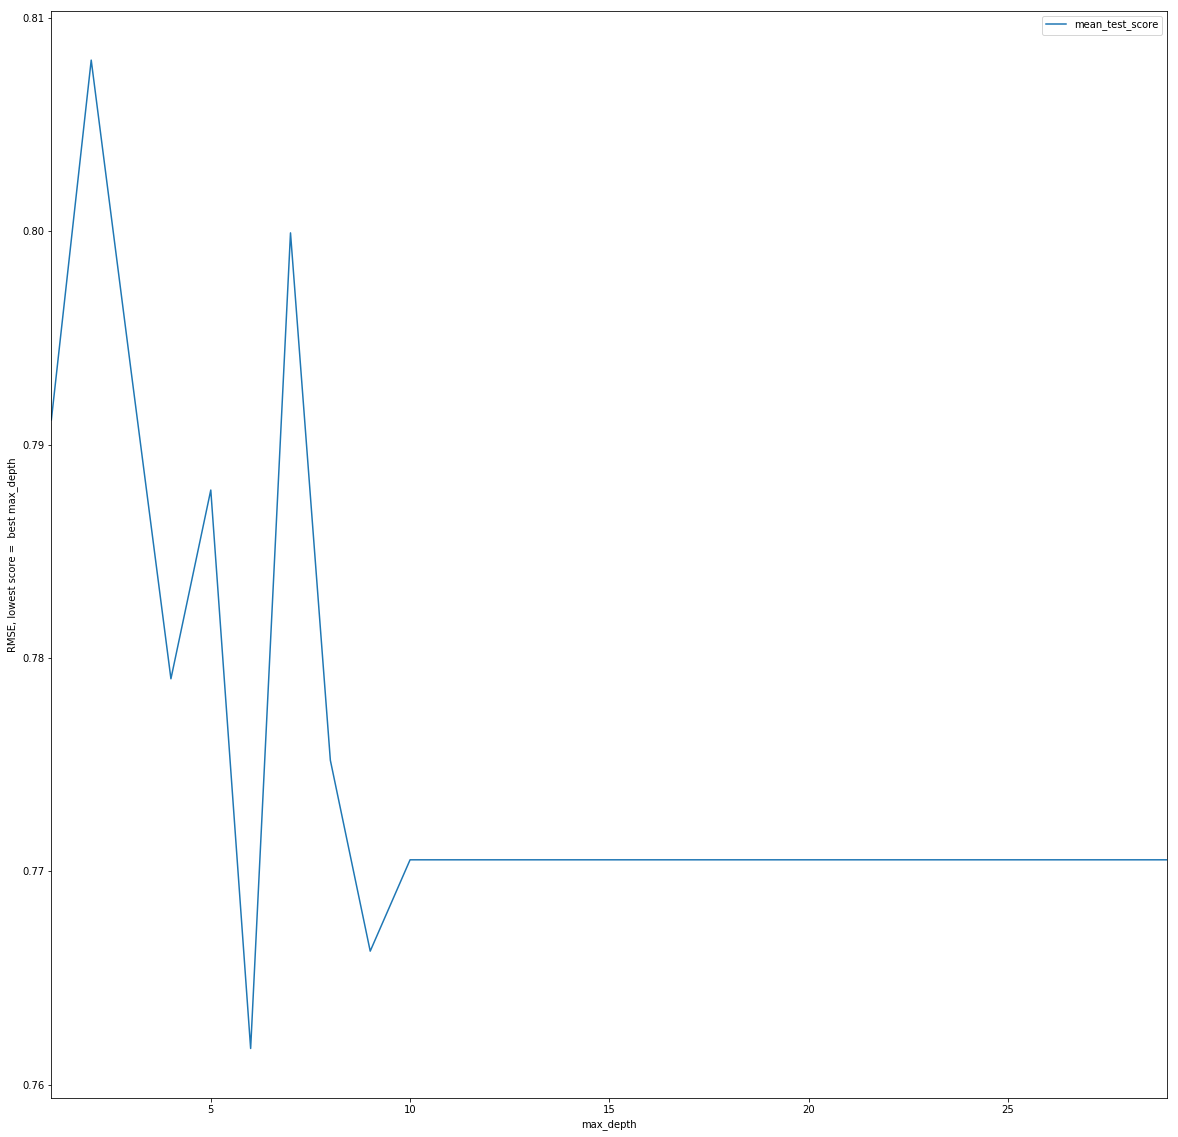

In [27]:
kf=KFold(5, shuffle=True, random_state=21) #splitting the data into 5 groups

grid =GridSearchCV(
    estimator=rfc,
    param_grid={'max_depth' : max_depth_range},
    cv=kf,
    return_train_score = True,
    scoring = neg_rmse_scorer
)#instaniating the grid search for cross validation

grid.fit(X,y)
scores = -pd.DataFrame(grid.cv_results_).loc[:, ['mean_test_score']]
scores.index = max_depth_range
ax = scores.plot(figsize=(20,20))#visualing the results using a line graph
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSE, lowest score =  best max_depth')

It looks like our best max_depth is 6 or 7.

In [40]:
rfc = RandomForestClassifier(max_depth=7, n_estimators=200, random_state=21)#in this current random state, 7 is doing better than 6.
rfc.fit(X_train,y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.78125


In [66]:
rfc = RandomForestClassifier(max_depth=7, n_estimators=200, random_state=21)#changing n_estimators by hand, I found 200 to be best.
rfc.fit(X_train,y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.78125


In [67]:
y_pred = rfc.predict(X_test)
true = np.array(y_test)
pred = np.array(y_pred)
print("MAE:",metrics.mean_absolute_error(true, pred))

MAE: 0.4375


In [56]:
#This time I will use Kfold to split the data into multiple test and training sets, using leave one out cross-validation
rfc_kf = RandomForestClassifier(n_estimators=200, max_depth=7)
kf = KFold(n_splits=5, shuffle=True)

rfc_grid = GridSearchCV(estimator=rfc_kf, param_grid={}, cv=kf, return_train_score=True)
rfc_grid.fit(X, y)
results = rfc_grid.cv_results_
#we get a score for every round, so here we are looking at the average of the score
print('train_score', results['mean_train_score'][0])
print('test_score', results['mean_test_score'][0])

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train_score 1.0
test_score 0.5849056603773585


Training the model using KFold cross validation gives poorer performance in this case. Of the models tested in this notebook, the Random Forest Classifier, using a simple train_test_split, with max_depth set at 7 and n_estimators set at 200, gives us the most accurate predictions.

In [68]:
food.diet_current_coded.value_counts()

2    48
1    46
3     9
4     3
Name: diet_current_coded, dtype: int64

There are only four outcomes that it could be. About 89% of the time the diet is either diet type 1 or diet type 2. So you could probably acheive a minimum of 44% accuracy flipping a coin to just guess 1 or just guess 2 every time. The best performing model here is at least better than that.